# Importing the necessary libraries

In [12]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the datasets

In [13]:
transactions_path = 'Transactions (1).csv'
customers_path = 'Customers.csv'

transactions_df = pd.read_csv(transactions_path)
customers_df = pd.read_csv(customers_path)

# Merge datasets
merged_df = transactions_df.merge(customers_df, on='CustomerID')

# Feature Engineering

In [14]:
customer_data = merged_df.groupby('CustomerID').agg({
    'TotalValue': 'sum',  # Total revenue per customer
    'Quantity': 'sum',    # Total items purchased
    'Price': 'mean',      # Average price per transaction
    'TransactionID': 'count'  # Number of transactions
}).rename(columns={'TransactionID': 'TransactionCount'}).reset_index()

In [15]:
# Standardize data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_data.drop('CustomerID', axis=1))

# Finding the optimal number of clusters using Elbow Method

In [16]:
inertia = []
range_n_clusters = range(2, 11)
for k in range_n_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

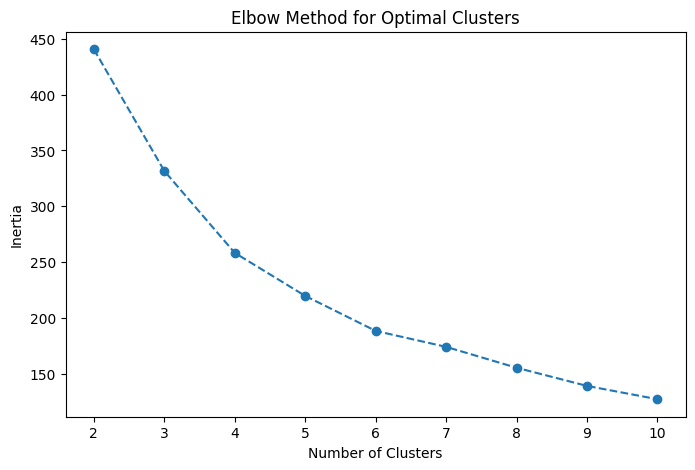

In [17]:
# Plot Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(range_n_clusters, inertia, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Taking optimal clusters as 4 from the graph above

In [18]:
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_features)

# Add cluster labels to the original data
customer_data['Cluster'] = cluster_labels

# Evaluate clustering
db_index = davies_bouldin_score(scaled_features, cluster_labels)
silhouette_avg = silhouette_score(scaled_features, cluster_labels)

print(f'Davies-Bouldin Index: {db_index}')
print(f'Silhouette Score: {silhouette_avg}')

Davies-Bouldin Index: 0.966505237178532
Silhouette Score: 0.3102577709374273


# Visualizing Clusters

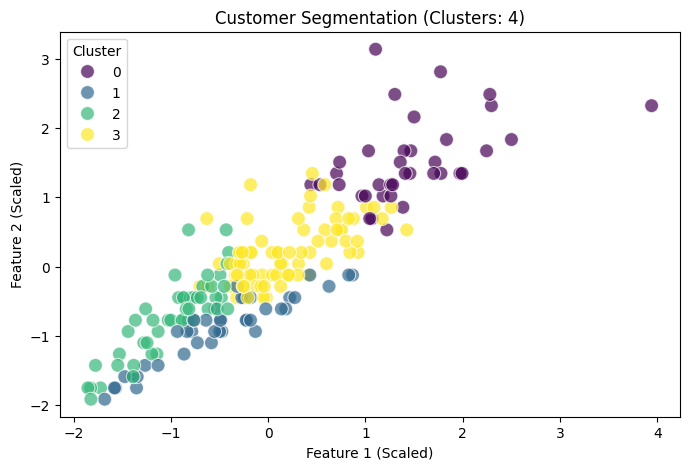

In [19]:
plt.figure(figsize=(8, 5))
sns.scatterplot(
    x=scaled_features[:, 0], y=scaled_features[:, 1],
    hue=cluster_labels, palette='viridis', s=100, alpha=0.7
)
plt.title(f'Customer Segmentation (Clusters: {optimal_clusters})')
plt.xlabel('Feature 1 (Scaled)')
plt.ylabel('Feature 2 (Scaled)')
plt.legend(title='Cluster')
plt.show()

In [20]:
# Save clustering results
customer_data.to_csv('Aranyak_Banerjee_Clustering.csv', index=False)